In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'C:\Users\aryan\Desktop\datasets\My Uber Drives - 2016.csv')
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
data.rename(columns=lambda x: x[:-1],inplace=True)
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
data.drop(1155,axis=0)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [7]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'],errors = 'coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'],errors = 'coerce')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
data.head(1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain


In [10]:
data=data.assign(Duration_in_min=lambda x: (data.MILES/25)*60)
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration_in_min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,12.24
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,11.52
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,11.28
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,152.88
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,9.36
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,38.88
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,15.36
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,115.68


Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

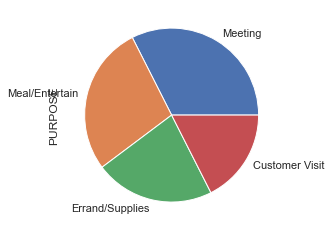

In [11]:
purpose = data['PURPOSE'].value_counts()
purpose[purpose>100].plot(kind='pie')
purpose

<Figure size 864x576 with 0 Axes>

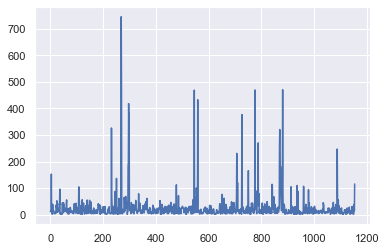

<Figure size 864x576 with 0 Axes>

In [12]:
data.drop(1155,axis=0,inplace=True)
plt.plot(data['Duration_in_min'])
plt.figure(figsize=(12,8))

In [13]:
data['PURPOSE'].dropna(inplace=True)

In [14]:
data['MILES'].mean()

10.566839826839812

In [15]:
data['Duration_in_min'].mean()

25.36041558441558

F:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

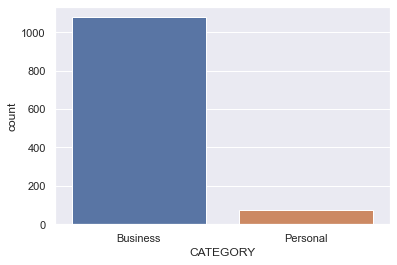

In [16]:
sns.countplot(data['CATEGORY'])

In [17]:
#average travell time is around 25 mins and average distance covered is 10 miles .
#Also with the countplot of categories we see that most of the rides are of business category.

# SO WE CAN SAY THAT MOST PEOPLE ARE TAKING BUSINESS CLASS RIDE WHICH LAST UP TO 25 MIN AND THE DISTANCE THEY COVER IS
# AROUND 10 MILES. SO THESE PEOPLE ARE ALREADY CUSTOMERS WE CAN INCREASE PRICE BY X% FOR BETTER PROFIT.



In [18]:
print(data['START'].value_counts())

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64


In [19]:
print(data['STOP'].value_counts())
data.groupby('STOP').sum()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64


,MILES,Duration_in_min
STOP,,
Agnew,11.7,28.08
Alief,15.5,37.20
Almond,6.6,15.84
Apex,102.2,245.28
Arabi,1.1,2.64
...,...,...
Weston,14.5,34.80
Westpark Place,36.0,86.40
Whitebridge,245.3,588.72


In [20]:
#the above 2 cells show that Most of the rides begin at cary and stop at agnew and alief  
# THESE ARE THE AREAS OF ALREADY SATISFIED CUSTOMERS OF UBER 
# PERHAPS WE CAN FOCUS ON AREAS OF START AND STOP LIKE ISLAMABAD AND WHITEBRIDGE AND GIVE DISCOUNT ON UBER RIDES IN THOSE 
# AREAS SO THAT PEOPLE LIVING THERE ARE ATTRACTED TO THE NEW OFFERS HENCE BETTER FOR BUSINESS.

<AxesSubplot:>

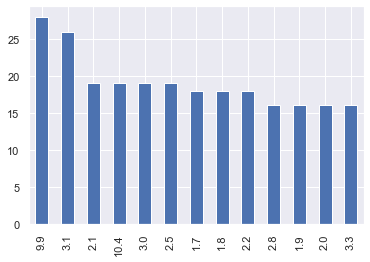

In [21]:
dist = data['MILES'].value_counts()
dist[dist>15].plot(kind = 'bar')

In [22]:
data.describe()

,MILES,Duration_in_min
count,1155.000000,1155.000000
mean,10.566840,25.360416
std,21.579106,51.789853
min,0.500000,1.200000
25%,2.900000,6.960000
50%,6.000000,14.400000
75%,10.400000,24.960000
max,310.300000,744.720000


In [23]:
#IN ORDER TO INCREASE THE AVERAGE RETENTION TIME OF THE RIDE WE NEED TO REDUCE THE AVERAGE SPEED OF UBER 
# WHICH IS CURRENTLY SET TO 25 MPH OR ABOUT 40 KMPH.  IF WE REDUCE THE AVG SPEED BY x% WE CAN INCREASE RETENTION 

# WITHOUT MUCH OF THE CONSIDERABLE DELAY...

# WHEN RETENTION INCREASES , THE CUSTOMER TRUST FACTOR INCREASES WHICH IS PROFITABLE FOR BUSINESS;

In [24]:
data['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [25]:
data.groupby('PURPOSE').mean()

,MILES,Duration_in_min
PURPOSE,,
Airport/Travel,5.500000,13.200000
Between Offices,10.944444,26.266667
Charity ($),15.100000,36.240000
Commute,180.200000,432.480000
Customer Visit,20.688119,49.651485
Errand/Supplies,3.968750,9.525000
Meal/Entertain,5.698125,13.675500
Meeting,15.247594,36.594225
Moving,4.550000,10.920000


F:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES'>

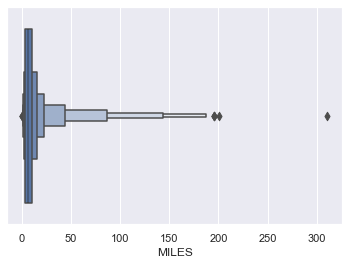

In [26]:
sns.boxenplot(data['MILES'])

F:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES'>

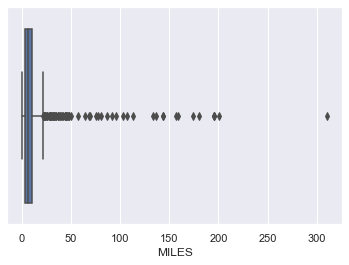

In [27]:
sns.boxplot(data['MILES'])

In [28]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Duration_in_min'],
      dtype='object')

In [29]:
data = data.assign(Round_trip = lambda x:(data.START==data.STOP))
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration_in_min,Round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,12.24,True
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.00,True
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,11.52,True
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,11.28,True
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,152.88,False
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1.68,True
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,9.36,False
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,38.88,True
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,15.36,False


In [30]:
data['Month'] = pd.DatetimeIndex(data['START_DATE']).month
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Duration_in_min,Round_trip,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,12.24,True,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.00,True,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,11.52,True,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,11.28,True,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,152.88,False,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1.68,True,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,9.36,False,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,38.88,True,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,15.36,False,12


In [31]:
data['Month'] = data['Month'].map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'Aug',9:'sept',10:'oct',11:'nov',12:'dec'})

<AxesSubplot:xlabel='Month'>

<Figure size 1152x576 with 0 Axes>

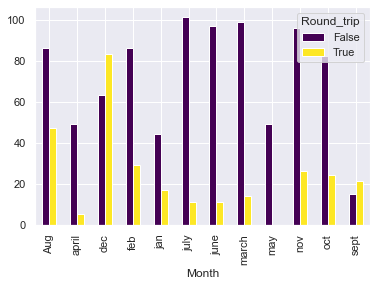

In [32]:
plt.figure(figsize=(16,8))
data.groupby('Month')['Round_trip'].value_counts().unstack().plot(kind='bar',cmap='viridis')

<AxesSubplot:xlabel='MILES', ylabel='Duration_in_min'>

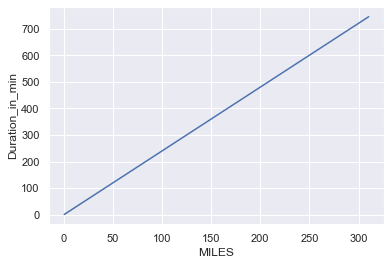

In [34]:
sns.lineplot(x='MILES',y='Duration_in_min',data=data)

<AxesSubplot:xlabel='MILES', ylabel='Duration_in_min'>

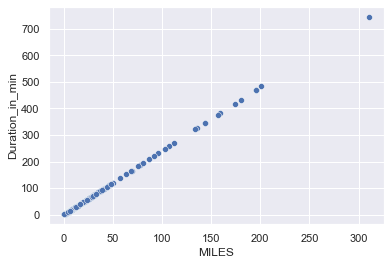

In [35]:
sns.scatterplot(x='MILES',y='Duration_in_min',data=data)

<AxesSubplot:xlabel='CATEGORY,PURPOSE'>

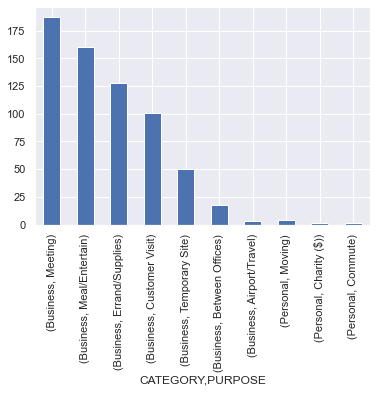

In [38]:
data.groupby('CATEGORY')['PURPOSE'].value_counts().plot(kind='bar')